<a href="https://colab.research.google.com/github/zaldaria/ImageClassificator/blob/main/ImageClasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras import layers, models

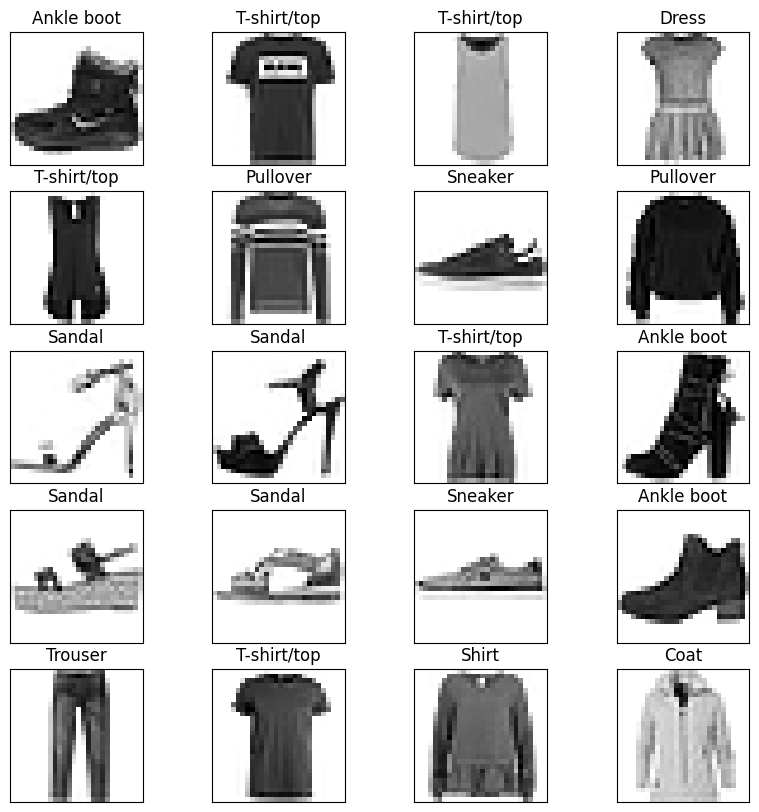

In [ ]:
# Load in the data
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_train = x_train / 255.0
x_test = x_test / 255.0

plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]])

plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 280,010 (1.07 MB)

 Trainable params: 280,010 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
education = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 116s 77ms/step - accuracy: 0.7588 - loss: 0.6589 - val_accuracy: 0.8751 - val_loss: 0.3463
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 140s 75ms/step - accuracy: 0.8831 - loss: 0.3212 - val_accuracy: 0.8903 - val_loss: 0.3021
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 114s 76ms/step - accuracy: 0.9076 - loss: 0.2562 - val_accuracy: 0.8972 - val_loss: 0.2818
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 112s 75ms/step - accuracy: 0.9156 - loss: 0.2278 - val_accuracy: 0.9057 - val_loss: 0.2646
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 113s 76ms/step - accuracy: 0.9284 - loss: 0.1948 - val_accuracy: 0.9076 - val_loss: 0.2539


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test data:\nAccuracy = ", test_acc, '\nLoss = ', test_loss)

predictions = model.predict(x_train)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9029 - loss: 0.2716
Test data:
Accuracy =  0.9053999781608582 
Loss =  0.26344138383865356
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step


[6.1480705e-09 2.1673736e-10 9.5551345e-10 4.4258444e-11 1.0553238e-12
 9.9999982e-01 7.0775663e-11 1.6190434e-07 2.6296263e-09 4.1810189e-08]
True label:  Sandal
Predicted:  Sandal


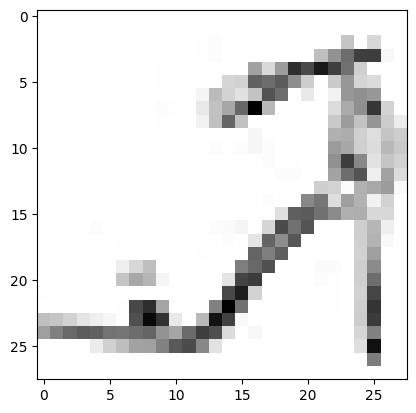

In [ ]:
print(predictions[8])

print('True label: ', class_names[y_train[8]])
print('Predicted: ', class_names[np.argmax(predictions[8])])

plt.figure()
plt.imshow(x_train[8], cmap=plt.cm.binary)